In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
movierat = pd.read_csv('prime_videos.csv')
movierat.head()

,rating,title_x,text,asin,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,rating_number,description,price,categories
0,5,Five Stars,"Amazon, please buy the show! I'm hooked!",B013488XFS,B013488XFS,2015-08-24 03:07:17.000,True,Prime Video,Sneaky Pete,4.6,56658.0,['A\xa0con man (Giovanni Ribisi) on the run fr...,NaN,Suspense
1,5,Five Stars,My Kiddos LOVE this show!!,B00CB6VTDS,B00CB6VTDS,2016-04-19 21:16:50.000,True,Prime Video,Creative Galaxy,4.8,6403.0,['Follow the adventures of Arty and his sideki...,NaN,Kids
2,5,What Love Is...,"...isn't always how you expect it to be, but w...",B001H1SVZC,B001H1SVZC,2020-05-28 04:13:47.074,True,Prime Video,NaN,4.5,389.0,NaN,NaN,NaN
3,5,QUIRKY TURNS TO HEARTSTRINGS,As you learn about the very unique characters ...,B06WVW16WY,B06WVW16WY,2020-04-16 01:15:47.540,True,Prime Video,NaN,4.8,1966.0,NaN,NaN,NaN
4,5,Way better than the harsh reviews.,Our family loved the film. We have kids and th...,B07RXM26FG,B07RXM26FG,2019-09-29 05:17:12.700,True,Prime Video,NaN,4.5,57962.0,NaN,NaN,NaN


In [3]:
movierat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233610 entries, 0 to 233609
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             233610 non-null  int64  
 1   title_x            233586 non-null  object 
 2   text               233579 non-null  object 
 3   asin               233610 non-null  object 
 4   parent_asin        233610 non-null  object 
 5   timestamp          233610 non-null  object 
 6   verified_purchase  233610 non-null  bool   
 7   main_category      233610 non-null  object 
 8   title_y            33800 non-null   object 
 9   average_rating     233607 non-null  float64
 10  rating_number      233607 non-null  float64
 11  description        33800 non-null   object 
 12  price              24165 non-null   float64
 13  categories         33800 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 23.4+ MB


In [4]:
movierat.describe()

,rating,average_rating,rating_number,price
count,233610.000000,233607.000000,233607.000000,24165.000000
mean,4.110111,4.437982,13781.706195,14.570061
std,1.287133,0.455424,22317.671491,7.190882
min,1.000000,1.000000,2.000000,0.000000
25%,4.000000,4.300000,752.000000,9.990000
50%,5.000000,4.600000,4375.000000,14.690000
75%,5.000000,4.700000,18000.000000,16.790000
max,5.000000,5.000000,241924.000000,124.990000


In [5]:
movierat.shape


(233610, 14)

In [6]:
movierat.isnull().sum()

rating                    0
title_x                  24
text                     31
asin                      0
parent_asin               0
timestamp                 0
verified_purchase         0
main_category             0
title_y              199810
average_rating            3
rating_number             3
description          199810
price                209445
categories           199810
dtype: int64

In [7]:
# Check unique values in categorical columns
movierat.nunique()


rating                    5
title_x              128590
text                 203164
asin                  60212
parent_asin           60212
timestamp            232499
verified_purchase         2
main_category             1
title_y                7847
average_rating           40
rating_number         11383
description            8367
price                   217
categories               29
dtype: int64

In [8]:
# Find duplicate rows
movierat.duplicated().sum()


538

In [9]:
# Check distribution of categorical columns
for col in movierat.select_dtypes(include=['object']).columns:
    print(f"{col}:\n", movierat[col].value_counts(), "\n")


title_x:
 title_x
Five Stars                                                   31814
Four Stars                                                    9983
Three Stars                                                   4890
One Star                                                      2543
Two Stars                                                     2284
                                                             ...  
Escape from this movie                                           1
Loved the books and they've done a great job adapting ...        1
Glad there's going to be a season 3                              1
Loved it. Hope there's a second season                           1
Pretty Good!!!                                                   1
Name: count, Length: 128590, dtype: int64 

text:
 text
Great movie                                                                                                                                                                                  

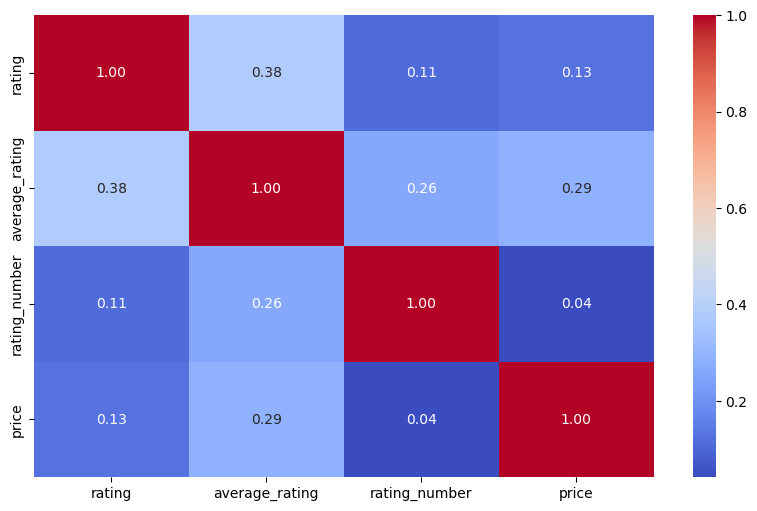

In [10]:

# Select only numeric columns
numeric_movierat = movierat.select_dtypes(include=['number'])

# Compute and plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_movierat.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()



In [11]:
movierat.dropna(inplace=True)


In [12]:
movierat = movierat.isnull().sum()
movierat

rating               0
title_x              0
text                 0
asin                 0
parent_asin          0
timestamp            0
verified_purchase    0
main_category        0
title_y              0
average_rating       0
rating_number        0
description          0
price                0
categories           0
dtype: int64

In [13]:
movierat.duplicated().sum()

13

In [14]:
movierat.drop_duplicates(inplace=True)


In [15]:
movierat.duplicated().sum()

0